## Atividade: Predição dos Gastos Médicos de Clientes

Uma seguradora deseja compreender os fatores que influenciam os custos médicos dos clientes para otimizar o cálculo de preços e gestão de riscos. Nesta atividade, você irá treinar um modelo de regressão linear para prever os gastos médicos anuais de indivíduos com base em suas características.



### Introdução

#### Regressão Linear

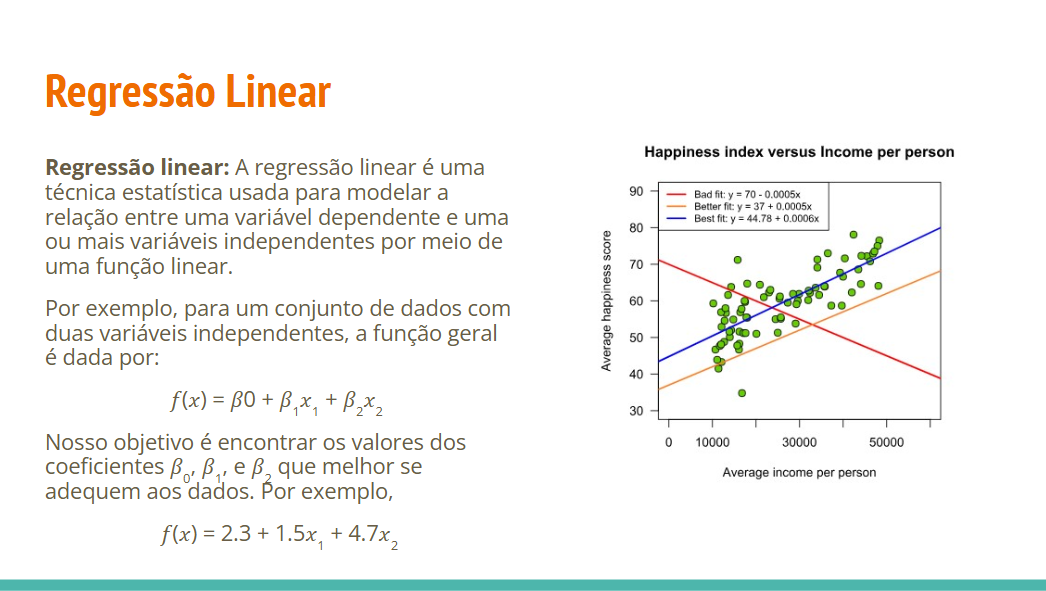

#### Métrica de Avaliação

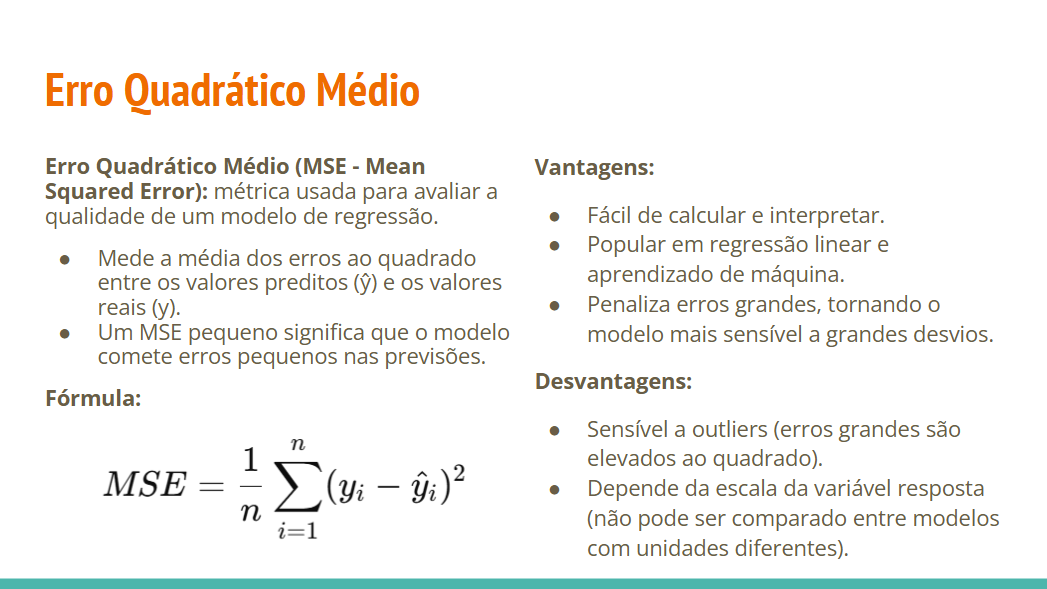

## Atividade

Os custos médicos de um indivíduo são influenciados por diversos fatores, como idade, índice de massa corporal (IMC), tabagismo e região de residência. Para uma operadora de saúde, prever com precisão esses custos é fundamental para garantir a sustentabilidade financeira e a precificação justa dos planos de seguro.

Nesta atividade, você irá desenvolver um modelo preditivo para estimar os gastos médicos futuros de novos segurados, utilizando os atributos disponíveis no conjunto de dados. Além disso, será possível analisar quais variáveis têm maior impacto nos custos, permitindo uma melhor compreensão dos fatores que elevam as despesas médicas.

Os dados para este estudo estão disponíveis no seguinte link: [Medical Insurance Price Prediction](https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction)

### Passos da Atividade

#### 1. Preparação e Análise Exploratória dos Dados
1. **Carregar o arquivo CSV** e visualizar as primeiras linhas.
2. **Verificar valores ausentes** e tratá-los, se necessário.
3. **Gerar estatísticas descritivas** para entender a distribuição dos dados.
4. **Criar gráficos exploratórios** para visualizar relações entre as variáveis.

#### 2. Processamento dos Dados
5. **Transformar variáveis categóricas** em numéricas.
6. **Dividir os dados** em **80% para treino e 20% para teste**.

#### 3. Treinamento do Modelo
7. **Treinar um modelo de Regressão Linear** para prever os custos médicos.
8. **Analisar os coeficientes do modelo** e interpretar o impacto de cada variável.

#### 4. Avaliação do Modelo
9. **Calcular métricas de desempenho**, incluindo:
   - **Erro Quadrático Médio (MSE)**
   - **Erro Absoluto Médio (MAE)**
   - **Coeficiente de Determinação (R²)**

10. **Gerar um gráfico de dispersão** comparando os valores reais e preditos.

#### 5. Extra: Exploração de Transformações de Variáveis
11. **Explorar diferentes transformações de variáveis** para avaliar o impacto nos resultados do modelo:
    - Aplicar **transformações logarítmicas** para capturar possíveis comportamentos exponenciais e reduzir assimetrias na distribuição.
    - Considerar **transformações quadráticas** para modelar relações não lineares entre as variáveis.
    - Testar **padronização ou normalização** das variáveis numéricas (`age`, `bmi`, etc.) para melhorar a estabilidade do modelo.
    - Criar **interações entre variáveis**, como `bmi * smoker`, para capturar efeitos combinados.
12. **Reajustar o modelo** com as variáveis transformadas e comparar os resultados com a versão original.


## Solução

### Importação de Bibliotecas

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### 1. Preparação e Análise Exploratória dos Dados

1. **Carregar o arquivo CSV** e visualizar as primeiras linhas.

In [161]:
df = pd.read_csv('Medical_insurance.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [162]:
# Verificar valores únicos de colunas categóricas
for col in df.select_dtypes(exclude=['number']).columns:
    print(f"Valores únicos da coluna '{col}':")
    print(df[col].unique())

Valores únicos da coluna 'sex':
['female' 'male']
Valores únicos da coluna 'smoker':
['yes' 'no']
Valores únicos da coluna 'region':
['southwest' 'southeast' 'northwest' 'northeast']


2. **Verificar valores ausentes** e tratá-los, se necessário.


In [163]:
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Não há valores faltantes no conjunto de dados.

3. **Gerar estatísticas descritivas** para entender a distribuição dos dados.

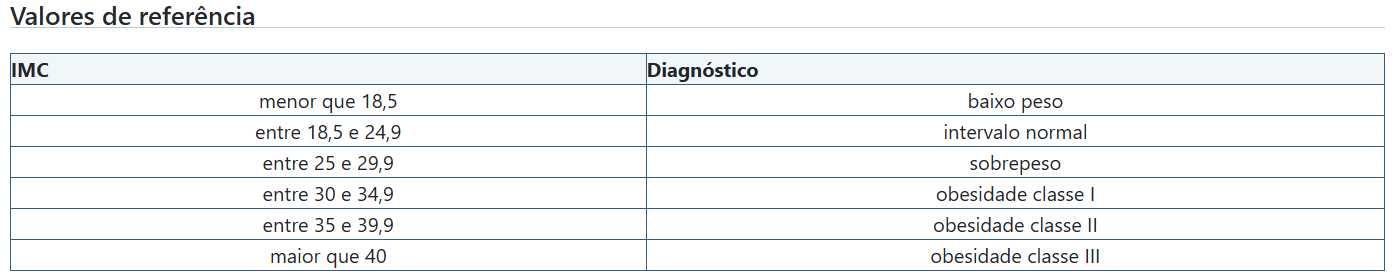

In [164]:
display(df.describe())

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


Parece não haver nenhum problema com as variáveis. Os valores se encontrma dentro de intervalos normais.

4. **Criar gráficos exploratórios** para visualizar relações entre as variáveis.

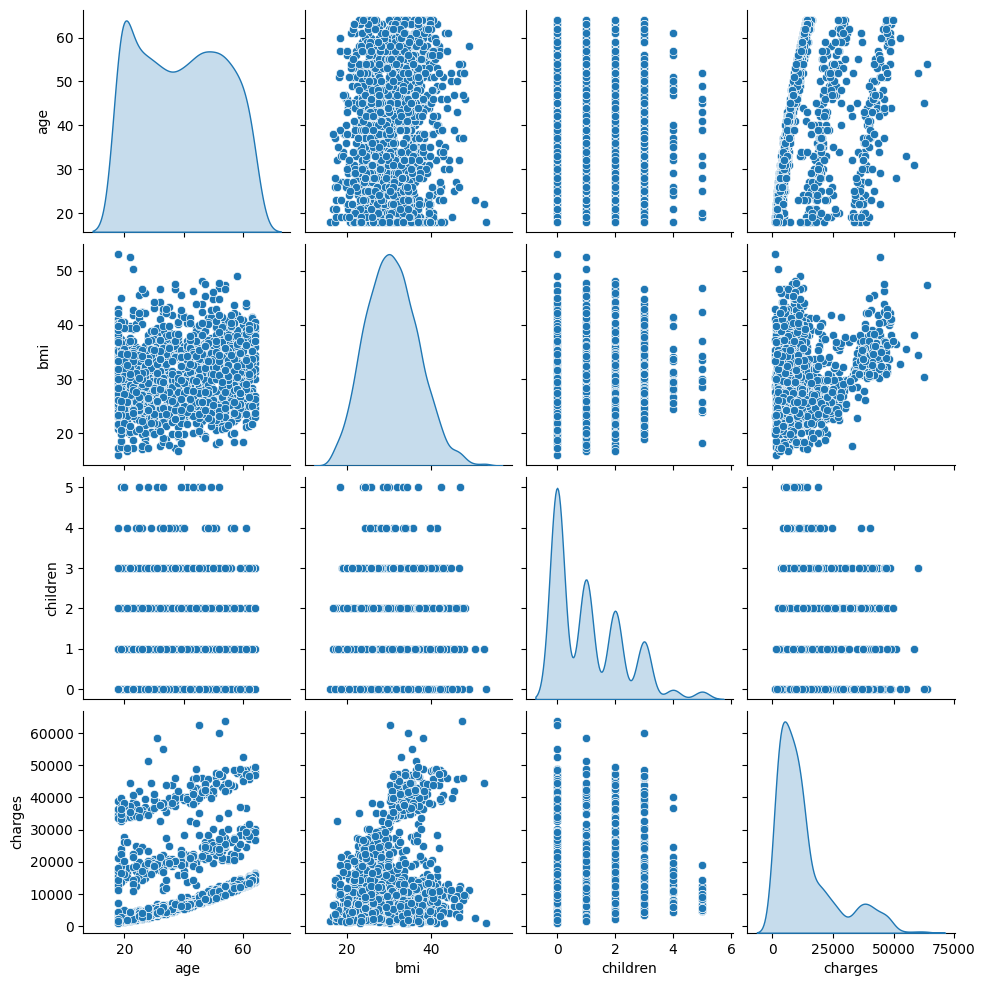

In [165]:
# Gráficos exploratórios
sns.pairplot(df, diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Distribuição dos Custos Médicos')

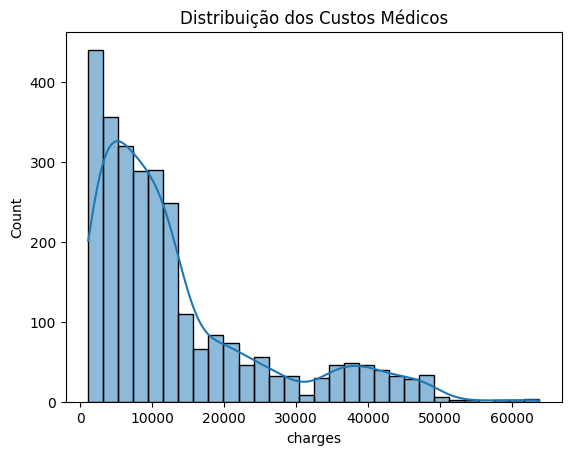

In [166]:
# Gráfico de distribuição dos custos médicos
sns.histplot(df['charges'], bins=30, kde=True)
plt.title("Distribuição dos Custos Médicos")

#### 2. Processamento dos Dados
5. **Transformar variáveis categóricas** em numéricas.

In [167]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [168]:
df_processed = pd.get_dummies(df, drop_first=True)

# Converter colunas booleanas para numéricas
df_processed = df_processed.astype(int)

print(f'Dataset com variáveis dummy: {df_processed.shape}')
df_processed.head()

Dataset com variáveis dummy: (2772, 9)


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


6. **Dividir os dados** em **80% para treino e 20% para teste**.

In [169]:
X = df_processed.drop(columns=['charges'])
y = df_processed['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Número de exemplos no conjunto treinamento: {len(X_train)}')
print(f'Número de exemplos no conjunto test: {len(X_test)}')

Número de exemplos no conjunto treinamento: 2217
Número de exemplos no conjunto test: 555


#### 3. Treinamento do Modelo
7. **Treinar um modelo de Regressão Linear** para prever os custos médicos.



In [170]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1864,21,36,0,1,0,0,1,0
1997,38,34,2,0,0,0,0,1
1336,21,25,0,0,0,0,0,1
655,52,25,2,0,1,0,1,0
261,20,26,1,0,1,0,1,0


In [171]:
# Obter nomes das colunas
print(X_train.columns)

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [172]:
# Selecionar variáveis de interesse
selected_features = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

# Filtrar os dados com as variáveis escolhidas
X_train_selected = X_train[selected_features]

# Adicionar intercepto ao modelo
X_train_const = sm.add_constant(X_train_selected)

# Criar e ajustar o modelo de regressão linear
model_sm = sm.OLS(y_train, X_train_const).fit()

# Exibir sumário completo da regressão
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     843.9
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:53:48   Log-Likelihood:                -22433.
No. Observations:                2217   AIC:                         4.488e+04
Df Residuals:                    2208   BIC:                         4.493e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.125e+04    750.824  

8. **Analisar os coeficientes do modelo** e interpretar o impacto de cada variável.

In [173]:
# Adicionar intercepto ao conjunto de teste
X_test_const = sm.add_constant(X_test)

# Fazer previsões
y_pred = model_sm.predict(X_test_const)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

MSE: 39953750.28
MAE: 4163.33
R²: 0.7397


10. **Gerar um gráfico de dispersão** comparando os valores reais e preditos.

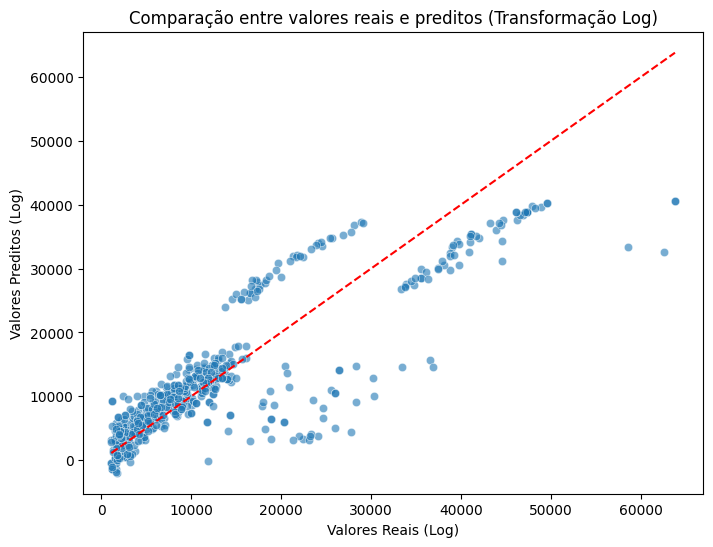

In [174]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valores Reais (Log)")
plt.ylabel("Valores Preditos (Log)")
plt.title("Comparação entre valores reais e preditos (Transformação Log)")
plt.show()

#### Estimativa Pontual